Objectives
1.	Build and analyze simple classification algorithms based on KNN and linear models
2.	Use k-fold cross validation (k=5) to identify the parameters that optimize performance (generalization) for each method
3.	Identify cases of underfitting and overfitting
4.	Select parameters that optimize performance (generalization)
5.	Compare the accuracy and explainability of each method

Problem #1
For this homework, you will apply the following classification methods to the SPAM e-mail data (available in Blackboard)

a)	KNN binary classifier. Vary the parameter K
b)	Logistic Regression classifier. Vary the regularization parameter C
c)	Linear Support Vector Machines classifier. Vary the regularization parameter C 

•	Apply 5-fold cross-validation to the provided training data to train your classifiers and identify their optimal parameters. 
•	After fixing the classifiers’ parameters, apply each method to the provided testing data to predict and analyze your results. Compare the accuracy obtained during training (average of the cross-validation folds) to those of the test data and comment on the results (overfitting, underfitting, etc.) 
•	Analyze the results of each method and identify/explain few (if any) common and different misclassified samples.
•	Select the best algorithm and justify your choice based on accuracy, explainability, time required to train/test, etc.
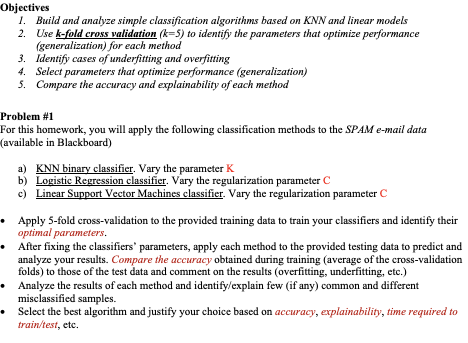

SPAM E-mail Database

The "spam" concept is diverse: advertisements for products/websites, make money fast schemes, chain letters, pornography... 
The collection of spam e-mails came from postmaster and individuals who had filed spam. 
The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam.
These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to 
generate a general purpose spam filter.

### Attribute Information:
The last column denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 
Most of the attributes indicate whether a particular word or character was frequently occurring in the e-mail. 
The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.


48 continuous real [0,100] attributes of type
word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0),
i.e. unsolicited commercial e-mail.

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [43]:
train_data = pd.read_csv('spam_train.csv')
test_data = pd.read_csv('spam_test.csv')

In [44]:
print(train_data.head())

   Unnamed: 0  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        3009            0.07                0.0           0.07           0.0   
1         798            0.00                0.0           0.74           0.0   
2        4396            0.00                0.0           0.00           0.0   
3         353            0.00                0.0           0.32           0.0   
4         574            1.03                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.00            0.00              0.00                0.46   
1           1.85            0.37              0.37                0.00   
2           0.00            0.00              0.00                0.00   
3           0.65            0.65              0.32                0.32   
4           0.00            0.00              0.00                0.00   

   word_freq_order  ...  char_freq_%3B  char_freq_%28  char_freq_%5B

In [45]:
print(test_data.head())

   Unnamed: 0  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        4175            0.00               0.00           1.57           0.0   
1        2228            0.00               0.00           0.00           0.0   
2        1803            0.00               1.03           0.00           0.0   
3        2077            2.77               0.00           0.00           0.0   
4        4390            0.00               0.00           1.72           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.22            0.22              0.00                0.00   
1           0.00            0.00              0.00                0.00   
2           1.03            0.00              1.03                0.51   
3           0.00            0.00              0.00                0.00   
4           0.00            0.00              0.00                0.00   

   word_freq_order  ...  char_freq_%3B  char_freq_%28  char_freq_%5B

In [46]:
train_data.shape

(3450, 59)

In [47]:
test_data.shape

(1151, 59)

In [48]:
print("Shape of X_train (features):", X_train.shape)
print("Shape of y_train (target):", y_train.shape)

print("Shape of X_test (features):", X_test.shape)
print("Shape of y_test (target):", y_test.shape)

Shape of X_train (features): (3450, 58)
Shape of y_train (target): (3450,)
Shape of X_test (features): (1151, 58)
Shape of y_test (target): (1151,)


In [49]:
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']

In [50]:
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']


In [52]:
test_data.shape

(1151, 59)

In [53]:
print("Shape of X_train (features):", X_train.shape)
print("Shape of y_train (target):", y_train.shape)

print("Shape of X_test (features):", X_test.shape)
print("Shape of y_test (target):", y_test.shape)

Shape of X_train (features): (3450, 58)
Shape of y_train (target): (3450,)
Shape of X_test (features): (1151, 58)
Shape of y_test (target): (1151,)


# KNN



In [54]:
k_values = [1, 3, 5, 7, 9]


In [55]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [57]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Train the model
        knn.fit(X_fold_train, y_fold_train)
        
        # Validate the model
        y_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_pred)
        fold_accuracies.append(accuracy)
    
    # Report average accuracy over folds
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"KNN with K={k}: Average CV accuracy = {avg_accuracy:.4f}")

KNN with K=1: Average CV accuracy = 0.9977
KNN with K=3: Average CV accuracy = 0.9980
KNN with K=5: Average CV accuracy = 0.9977
KNN with K=7: Average CV accuracy = 0.9974
KNN with K=9: Average CV accuracy = 0.9962


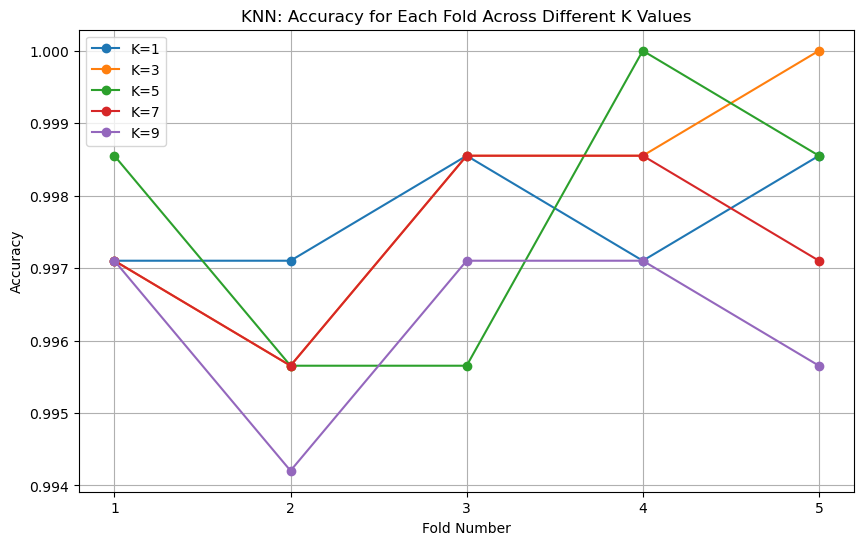

In [59]:
import matplotlib.pyplot as plt


k_values = [1, 3, 5, 7, 9]
all_fold_accuracies = {}  

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
    
        knn.fit(X_fold_train, y_fold_train)
        

        y_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_pred)
        fold_accuracies.append(accuracy)
    
 
    all_fold_accuracies[k] = fold_accuracies


plt.figure(figsize=(10, 6))

for k in k_values:
    plt.plot(range(1, 6), all_fold_accuracies[k], marker='o', linestyle='-', label=f'K={k}')

plt.title('KNN: Accuracy for Each Fold Across Different K Values')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))  
plt.grid(True)
plt.legend()
plt.show()

Logistic Regression

In [67]:
C_values = [0.01, 0.1, 1, 10, 100]
avg_accuracies = []  

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
for C in C_values:
    log_reg = LogisticRegression(C=C, max_iter=10000)
    fold_accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
      
        log_reg.fit(X_fold_train, y_fold_train)
        

        y_pred = log_reg.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_pred)
        fold_accuracies.append(accuracy)
    
 
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    avg_accuracies.append(avg_accuracy)  

    print(f"Logistic Regression with C={C}: Average CV accuracy = {avg_accuracy:.4f}")
 


Logistic Regression with C=0.01: Average CV accuracy = 0.9997
Logistic Regression with C=0.1: Average CV accuracy = 0.9997
Logistic Regression with C=1: Average CV accuracy = 0.9997
Logistic Regression with C=10: Average CV accuracy = 0.9997


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Logistic Regression with C=100: Average CV accuracy = 0.9988


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


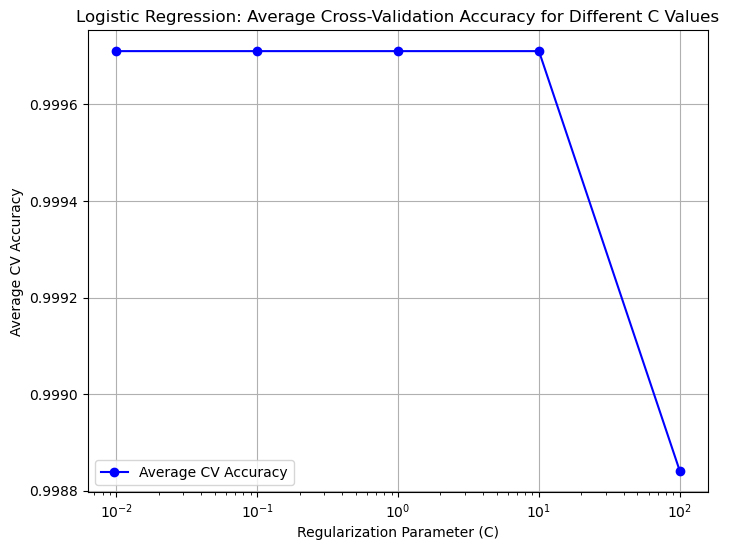

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(C_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.xscale('log')  # Since C is usually plotted on a logarithmic scale
plt.title('Logistic Regression: Average Cross-Validation Accuracy for Different C Values')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Average CV Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [72]:
C_values = [0.01, 0.1, 1, 10, 100]


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for C in C_values:
    svm = SVC(C=C, max_iter=10000)  
    fold_accuracies = []  
    
    
    for train_index, val_index in kf.split(X_train):
        
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
       
        svm.fit(X_fold_train, y_fold_train)
        
        
        y_pred = svm.predict(X_fold_val)
        
        
        accuracy = accuracy_score(y_fold_val, y_pred)
        fold_accuracies.append(accuracy)  
    
   
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    
   
    print(f"SVM with C={C}: Average CV accuracy = {avg_accuracy:.4f}")

SVM with C=0.01: Average CV accuracy = 0.9884
SVM with C=0.1: Average CV accuracy = 0.9893
SVM with C=1: Average CV accuracy = 0.9916
SVM with C=10: Average CV accuracy = 0.9965
SVM with C=100: Average CV accuracy = 0.9974


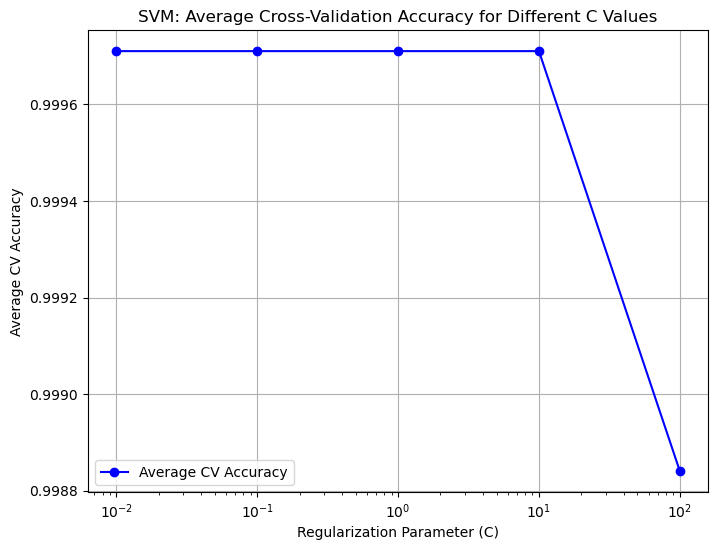

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(C_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.xscale('log') 
plt.title('SVM: Average Cross-Validation Accuracy for Different C Values')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Average CV Accuracy')
plt.grid(True)
plt.legend()
plt.show()